In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Let's check the data

In [2]:
covid=pd.read_csv("data.csv")

In [3]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03-05-20,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-20,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-20,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-20,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-20,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid.shape

(1048575, 21)

We can see that there are 1048575 rows and 21 features

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
covid.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASSIFICATION_FINAL    0
ICU                     0
dtype: int64

We can see that there are no null/missing values, but also as specified in dataset, the missing values are replaced by values such as 97,97 and 99

We also have to look into the DATE_DIED column as it contains a different classification of data,so we will change the 9999-99-99 to 2, which means no(basically not dead) and the rest to 1 (which means dead) so that this column is also a type of category thing.

In [7]:
covid['DEATH']=[2 if each =="9999-99-99" else  1 for each in covid['DATE_DIED']]

In [8]:
covid.drop(columns='DATE_DIED',inplace=True)

In [9]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU,DEATH
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,...,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01,1.926622e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,...,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01,2.607556e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01,2.000000e+00


In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   INTUBED               1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

## Data Preprocessing
Let us have a look at how many values are missing and what to do with those

In [11]:
covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASSIFICATION_FINAL      7
ICU                       4
DEATH                     2
dtype: int64

We can infer from these that when number of unique values is 2, then we are sure that its either 1(yes) or 2(no).
Then if the unique values are 3 ,then apart from yes and no there is one missing value parameter too and same goes for 4.  
Lets find out how many missing values are there, and if they are significantly large enough, we will remove them.

In [12]:
covid['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

There is so much (like 90%) of the data which is missing and which makes it an unusable parameter, so we'll remove it.

In [13]:
covid.drop(columns='INTUBED',inplace=True)

In [14]:
covid['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [15]:
covid['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

Again,we can see like half of the data missing and men cant be pregnate and there is a direct relationship between the SEX and PREGNANT count. So we first try to check the relation.  
Before that, lets convert the men count (97) data into non pregnant(2).  

In [16]:
covid['PREGNANT']=covid['PREGNANT'].replace(97,2)

In [17]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   PNEUMONIA             1048575 non-null  int64
 5   AGE                   1048575 non-null  int64
 6   PREGNANT              1048575 non-null  int64
 7   DIABETES              1048575 non-null  int64
 8   COPD                  1048575 non-null  int64
 9   ASTHMA                1048575 non-null  int64
 10  INMSUPR               1048575 non-null  int64
 11  HIPERTENSION          1048575 non-null  int64
 12  OTHER_DISEASE         1048575 non-null  int64
 13  CARDIOVASCULAR        1048575 non-null  int64
 14  OBESITY               1048575 non-null  int64
 15  RENAL_CHRONIC  

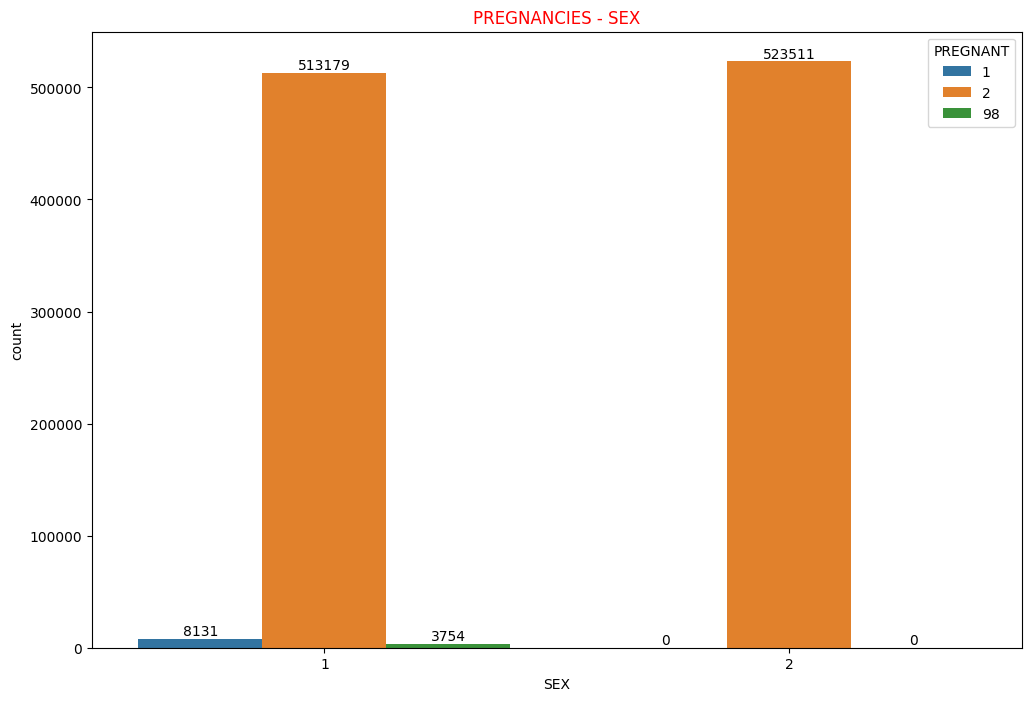

In [18]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="SEX",hue="PREGNANT",data=covid)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");
plt.show()

In [19]:
covid['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [20]:
covid['AGE'].value_counts()

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64

In [21]:
covid['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [22]:
covid['COPD'].value_counts()

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [23]:
covid['ASTHMA'].value_counts()

2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [24]:
covid['INMSUPR'].value_counts()

2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [25]:
covid['HIPERTENSION'].value_counts()

2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [26]:
covid['CARDIOVASCULAR'].value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [27]:
covid['OTHER_DISEASE'].value_counts()

2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [28]:
covid['OBESITY'].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [29]:
covid['RENAL_CHRONIC'].value_counts()

2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64

In [30]:
covid['TOBACCO'].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [31]:
covid['CLASSIFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASSIFICATION_FINAL, dtype: int64

In [32]:
covid['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

Now we can see too many missing data, so we will drop this column.

In [33]:
covid.drop(columns='ICU',inplace=True)

In [34]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   PNEUMONIA             1048575 non-null  int64
 5   AGE                   1048575 non-null  int64
 6   PREGNANT              1048575 non-null  int64
 7   DIABETES              1048575 non-null  int64
 8   COPD                  1048575 non-null  int64
 9   ASTHMA                1048575 non-null  int64
 10  INMSUPR               1048575 non-null  int64
 11  HIPERTENSION          1048575 non-null  int64
 12  OTHER_DISEASE         1048575 non-null  int64
 13  CARDIOVASCULAR        1048575 non-null  int64
 14  OBESITY               1048575 non-null  int64
 15  RENAL_CHRONIC  

## Removing the missing rows
We will remove the missing rows which have very less number of missing data compared to the original data

In [35]:
covid = covid[(covid.PNEUMONIA == 1) | (covid.PNEUMONIA == 2)]
covid = covid[(covid.DIABETES == 1) | (covid.DIABETES == 2)]
covid = covid[(covid.COPD == 1) | (covid.COPD == 2)]
covid = covid[(covid.ASTHMA == 1) | (covid.ASTHMA == 2)]
covid = covid[(covid.INMSUPR == 1) | (covid.INMSUPR == 2)]
covid = covid[(covid.HIPERTENSION == 1) | (covid.HIPERTENSION == 2)]
covid = covid[(covid.OTHER_DISEASE == 1) | (covid.OTHER_DISEASE == 2)]
covid = covid[(covid.CARDIOVASCULAR == 1) | (covid.CARDIOVASCULAR == 2)]
covid = covid[(covid.OBESITY == 1) | (covid.OBESITY == 2)]
covid = covid[(covid.RENAL_CHRONIC == 1) | (covid.RENAL_CHRONIC == 2)]
covid = covid[(covid.TOBACCO == 1) | (covid.TOBACCO == 2)]

In [36]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1025152 non-null  int64
 1   MEDICAL_UNIT          1025152 non-null  int64
 2   SEX                   1025152 non-null  int64
 3   PATIENT_TYPE          1025152 non-null  int64
 4   PNEUMONIA             1025152 non-null  int64
 5   AGE                   1025152 non-null  int64
 6   PREGNANT              1025152 non-null  int64
 7   DIABETES              1025152 non-null  int64
 8   COPD                  1025152 non-null  int64
 9   ASTHMA                1025152 non-null  int64
 10  INMSUPR               1025152 non-null  int64
 11  HIPERTENSION          1025152 non-null  int64
 12  OTHER_DISEASE         1025152 non-null  int64
 13  CARDIOVASCULAR        1025152 non-null  int64
 14  OBESITY               1025152 non-null  int64
 15  RENAL_CHRONIC  

## Visualizing the data
Now we will derive some relations between death and other factors

In [37]:
covid.corr()['DEATH'].sort_values(ascending=False)

DEATH                   1.000000
PNEUMONIA               0.470800
DIABETES                0.217115
HIPERTENSION            0.205158
CLASSIFICATION_FINAL    0.197313
MEDICAL_UNIT            0.154588
RENAL_CHRONIC           0.119396
USMER                   0.118973
COPD                    0.089846
CARDIOVASCULAR          0.076582
OTHER_DISEASE           0.057247
OBESITY                 0.056427
INMSUPR                 0.049308
PREGNANT                0.011433
TOBACCO                 0.005245
ASTHMA                 -0.017221
SEX                    -0.080882
AGE                    -0.322412
PATIENT_TYPE           -0.520023
Name: DEATH, dtype: float64

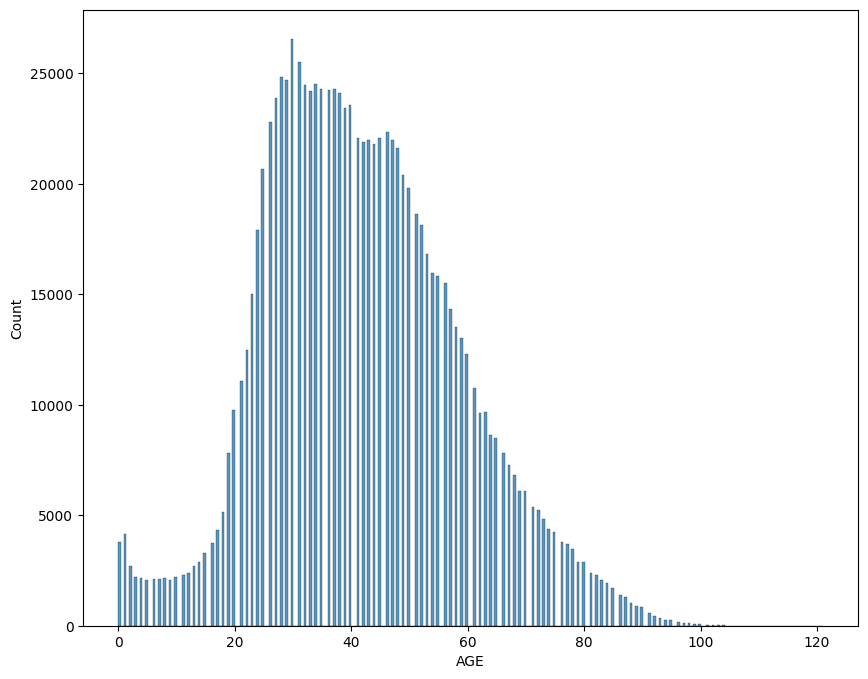

In [38]:
plt.figure(figsize=(10,8))
sns.histplot(x=covid['AGE'])
plt.savefig('age.png')

<AxesSubplot: >

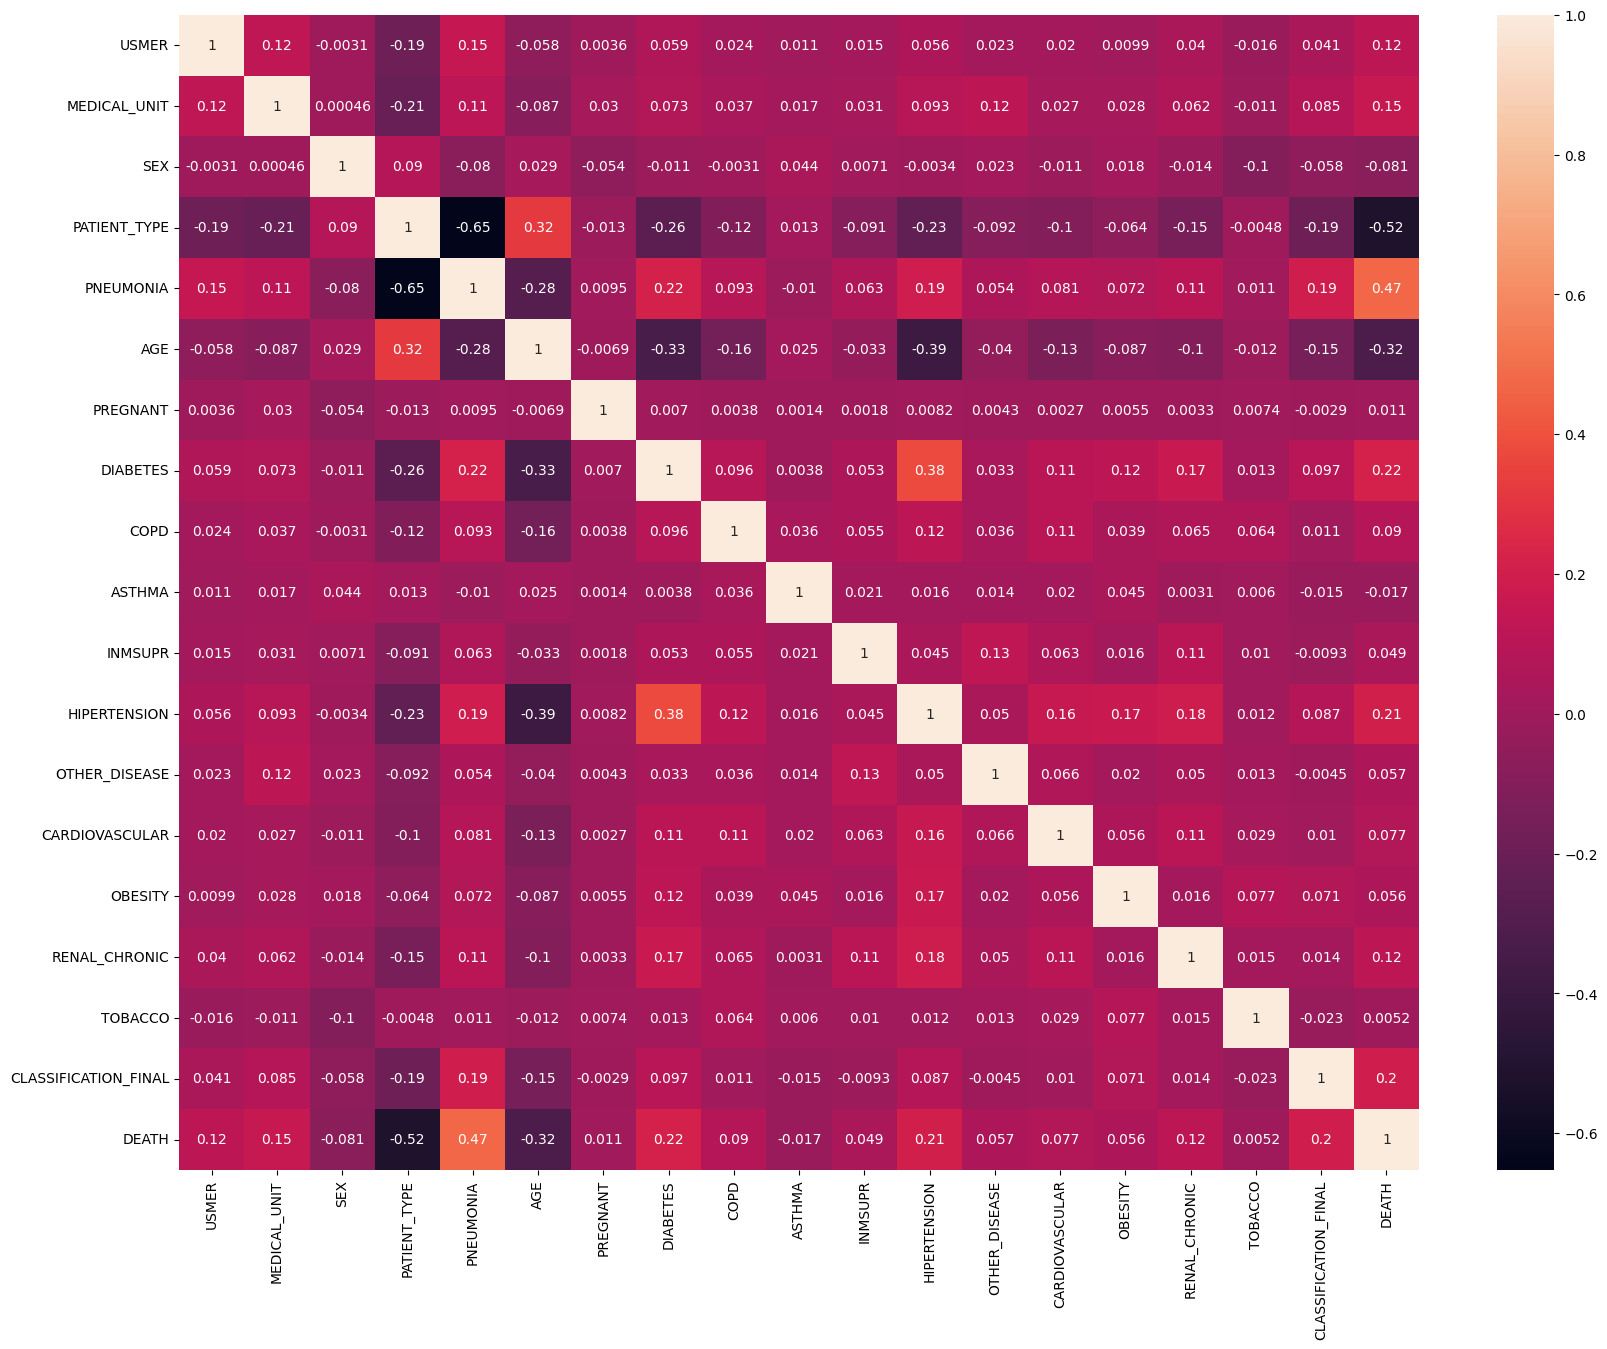

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(covid.corr(),annot=True)

Observations:
1. The highly correlated factors with death are the ones with which are shaded with dark colour(correlation factor less than -0.2) or the ones shaded with light colours(correlation factor greater than 0.2).
2. We will keep only these shades as they matter the most with death and drop the remaining columns.

In [40]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

covid.drop(columns=unrelevant_columns,inplace=True)

In [41]:
covid.describe()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASSIFICATION_FINAL,DEATH
count,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06
mean,1.642105e+00,8.993643e+00,1.187191e+00,1.865777e+00,4.188778e+01,1.880588e+00,1.844338e+00,1.982099e+00,5.291136e+00,1.927119e+00
std,4.793813e-01,3.722439e+00,3.900648e-01,3.408919e-01,1.674833e+01,3.242723e-01,3.625346e-01,1.325909e-01,1.889586e+00,2.599410e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00


In [42]:
covid = pd.get_dummies(covid,columns=["MEDICAL_UNIT","CLASSIFICATION_FINAL"],drop_first=True)

In [43]:
# scaler = RobustScaler()
# covid.AGE = scaler.fit_transform(covid.AGE.values.reshape(-1,1))

In [44]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   USMER                   1025152 non-null  int64
 1   PATIENT_TYPE            1025152 non-null  int64
 2   PNEUMONIA               1025152 non-null  int64
 3   AGE                     1025152 non-null  int64
 4   DIABETES                1025152 non-null  int64
 5   HIPERTENSION            1025152 non-null  int64
 6   RENAL_CHRONIC           1025152 non-null  int64
 7   DEATH                   1025152 non-null  int64
 8   MEDICAL_UNIT_2          1025152 non-null  uint8
 9   MEDICAL_UNIT_3          1025152 non-null  uint8
 10  MEDICAL_UNIT_4          1025152 non-null  uint8
 11  MEDICAL_UNIT_5          1025152 non-null  uint8
 12  MEDICAL_UNIT_6          1025152 non-null  uint8
 13  MEDICAL_UNIT_7          1025152 non-null  uint8
 14  MEDICAL_UNIT_8          1025152 no

In [45]:
covid["PATIENT_TYPE"].value_counts()

1    833253
2    191899
Name: PATIENT_TYPE, dtype: int64

In [46]:
covid.corr()['DEATH'].sort_values(ascending=False)

DEATH                     1.000000
PNEUMONIA                 0.470800
DIABETES                  0.217115
HIPERTENSION              0.205158
CLASSIFICATION_FINAL_7    0.172424
MEDICAL_UNIT_12           0.150388
RENAL_CHRONIC             0.119396
USMER                     0.118973
MEDICAL_UNIT_9            0.027839
CLASSIFICATION_FINAL_5    0.017371
CLASSIFICATION_FINAL_6    0.014901
CLASSIFICATION_FINAL_4    0.005627
MEDICAL_UNIT_7            0.003410
MEDICAL_UNIT_2            0.002287
MEDICAL_UNIT_11          -0.000004
MEDICAL_UNIT_13          -0.000100
MEDICAL_UNIT_3           -0.002724
MEDICAL_UNIT_5           -0.003462
MEDICAL_UNIT_8           -0.016079
MEDICAL_UNIT_10          -0.034569
MEDICAL_UNIT_6           -0.055971
MEDICAL_UNIT_4           -0.139503
CLASSIFICATION_FINAL_2   -0.149625
CLASSIFICATION_FINAL_3   -0.179366
AGE                      -0.322412
PATIENT_TYPE             -0.520023
Name: DEATH, dtype: float64

In [47]:
covid.nunique()

USMER                       2
PATIENT_TYPE                2
PNEUMONIA                   2
AGE                       121
DIABETES                    2
HIPERTENSION                2
RENAL_CHRONIC               2
DEATH                       2
MEDICAL_UNIT_2              2
MEDICAL_UNIT_3              2
MEDICAL_UNIT_4              2
MEDICAL_UNIT_5              2
MEDICAL_UNIT_6              2
MEDICAL_UNIT_7              2
MEDICAL_UNIT_8              2
MEDICAL_UNIT_9              2
MEDICAL_UNIT_10             2
MEDICAL_UNIT_11             2
MEDICAL_UNIT_12             2
MEDICAL_UNIT_13             2
CLASSIFICATION_FINAL_2      2
CLASSIFICATION_FINAL_3      2
CLASSIFICATION_FINAL_4      2
CLASSIFICATION_FINAL_5      2
CLASSIFICATION_FINAL_6      2
CLASSIFICATION_FINAL_7      2
dtype: int64

In [48]:
temp=covid
a = temp.drop(columns="PATIENT_TYPE")
b = temp["PATIENT_TYPE"]
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
a,b = rus.fit_resample(a,b)
covid["PATIENT_TYPE"]=b

In [49]:
covid["PATIENT_TYPE"].value_counts()

1.0    186766
2.0    186349
Name: PATIENT_TYPE, dtype: int64

In [50]:
covid["PATIENT_TYPE"]=covid["PATIENT_TYPE"].fillna(0).astype(np.int64)

In [51]:
covid["PATIENT_TYPE"].value_counts()

0    652037
1    186766
2    186349
Name: PATIENT_TYPE, dtype: int64

In [52]:
covid = covid[(covid.PATIENT_TYPE == 1) | (covid.PATIENT_TYPE== 2)]

In [53]:
covid.corr()['DEATH'].sort_values(ascending=False)

DEATH                     1.000000
PNEUMONIA                 0.446630
PATIENT_TYPE              0.267344
DIABETES                  0.242937
HIPERTENSION              0.239950
CLASSIFICATION_FINAL_7    0.165679
RENAL_CHRONIC             0.134944
USMER                     0.085138
CLASSIFICATION_FINAL_6    0.067848
MEDICAL_UNIT_3            0.035023
MEDICAL_UNIT_5            0.018881
CLASSIFICATION_FINAL_5    0.016693
MEDICAL_UNIT_7            0.012516
MEDICAL_UNIT_2            0.006409
MEDICAL_UNIT_4            0.006290
CLASSIFICATION_FINAL_4   -0.003697
MEDICAL_UNIT_6           -0.017901
MEDICAL_UNIT_8           -0.144212
CLASSIFICATION_FINAL_2   -0.155444
CLASSIFICATION_FINAL_3   -0.199272
AGE                      -0.419433
MEDICAL_UNIT_9                 NaN
MEDICAL_UNIT_10                NaN
MEDICAL_UNIT_11                NaN
MEDICAL_UNIT_12                NaN
MEDICAL_UNIT_13                NaN
Name: DEATH, dtype: float64

## Splitting the data into test and training data

In [54]:
x = covid.drop(columns="DEATH")
y = covid["DEATH"]

In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x,y = rus.fit_resample(x,y)

In [56]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (77188, 25)
Test_x : (19298, 25)
Train_y : (77188,)
Test_y : (19298,)


In [57]:
print(test_x)

       USMER  PATIENT_TYPE  PNEUMONIA  AGE  DIABETES  HIPERTENSION  \
14562      1             1          2   71         2             1   
72248      1             1          2   38         2             2   
30338      2             1          2   77         1             1   
67646      1             2          1   26         2             2   
66223      1             1          2   32         2             2   
...      ...           ...        ...  ...       ...           ...   
39546      1             1          1   50         1             2   
64880      2             1          2   46         2             2   
42813      1             2          1   63         2             1   
43681      2             2          1   59         2             1   
58850      1             2          2   46         2             2   

       RENAL_CHRONIC  MEDICAL_UNIT_2  MEDICAL_UNIT_3  MEDICAL_UNIT_4  ...  \
14562              2               0               0               1  ...   
72248

In [58]:
print(covid.iloc[0])

USMER                      2
PATIENT_TYPE               1
PNEUMONIA                  1
AGE                       65
DIABETES                   2
HIPERTENSION               1
RENAL_CHRONIC              2
DEATH                      1
MEDICAL_UNIT_2             0
MEDICAL_UNIT_3             0
MEDICAL_UNIT_4             0
MEDICAL_UNIT_5             0
MEDICAL_UNIT_6             0
MEDICAL_UNIT_7             0
MEDICAL_UNIT_8             0
MEDICAL_UNIT_9             0
MEDICAL_UNIT_10            0
MEDICAL_UNIT_11            0
MEDICAL_UNIT_12            0
MEDICAL_UNIT_13            0
CLASSIFICATION_FINAL_2     0
CLASSIFICATION_FINAL_3     1
CLASSIFICATION_FINAL_4     0
CLASSIFICATION_FINAL_5     0
CLASSIFICATION_FINAL_6     0
CLASSIFICATION_FINAL_7     0
Name: 0, dtype: int64


In [59]:
covid['CLASSIFICATION_FINAL_2'].value_counts()

0    371781
1      1334
Name: CLASSIFICATION_FINAL_2, dtype: int64

## Training the data using various algorithms

### Logistic Regression

In [60]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
y_pred_logreg=logreg.predict(test_x)
acc_logreg=metrics.accuracy_score(test_y,y_pred_logreg)
print("Accuracy of Logistic Regression model is:",acc_logreg)
print("Precision: ",metrics.precision_score(test_y,y_pred_logreg))
print("Logistic Regression F1 Score :",metrics.f1_score(test_y,logreg.predict(test_x),average=None))

Accuracy of Logistic Regression model is: 0.8814903098766712
Precision:  0.8746978243352136
Logistic Regression F1 Score : [0.88364284 0.87925664]


### Random Forest

In [61]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
y_pred_rf=rf.predict(test_x)
acc_rf=metrics.accuracy_score(test_y,y_pred_rf)
print("Accuracy of Random Forest model is:",acc_rf)
print("Precision: ",metrics.precision_score(test_y,y_pred_rf))

Accuracy of Random Forest model is: 0.8836667012125609
Precision:  0.869299111549852


In [62]:
print("Random F1 Score :",metrics.f1_score(test_y,rf.predict(test_x),average=None))

Random F1 Score : [0.88694163 0.88019638]


### Gradient Boosting 

In [63]:
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
y_pred_gb=gb.predict(test_x)
acc_gb=metrics.accuracy_score(test_y,y_pred_gb)
print("Accuracy of Gradient Boosting model is:",acc_gb)
print("Precision: ",metrics.precision_score(test_y,y_pred_gb))

Accuracy of Gradient Boosting model is: 0.891802259301482
Precision:  0.8717274939172749


In [64]:
print("GB F1 Score :",metrics.f1_score(test_y,gb.predict(test_x),average=None))

GB F1 Score : [0.89561044 0.88770571]


In [65]:
import pickle
filename="model_final.pkl"
pickle.dump(logreg,open(filename,'wb'))

In [66]:
input=[[1 , 2 ,  2, 150 ,  0  , 2  , 2  , 0  , 0  , 0  , 0  , 1  , 0  , 0  , 0  , 0 ,  0 ,  0 , 0  , 0 ,  1 ,  0 ,  0 ,  0,   0]]
input=np.array(input)
pred=logreg.predict(input)
print(pred)

[1]
